In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.var_selection import   prepare_model_data, initiate_models, \
                                apply_forward_selection, save_SFS_iteration, \
                                apply_lassoCV, save_lasso_iter
from src.model_performance_plots import plot_optimum_models, plot_all_models
from src.pca import get_cmap


# Prepare input data

In [2]:
matrix_file = './Outputs/Event_Matrix.csv'

# read data, split train and test and normalize using sklearn.preprocessing.StandardScaler()
X_train, X_test, y_train, y_test, var_names, group_names = prepare_model_data(data_file = matrix_file, test_size = 0.2)

print("Number of predictors: ", X_train.shape[1])

print("Number of training samples: ", X_train.shape[0])

print("Number of testing samples: ", X_test.shape[0])


Number of predictors:  45
Number of training samples:  60
Number of testing samples:  15


In [17]:
filtered_df = pd.DataFrame(data = X_train, columns = var_names)[["P_15h_acum", "P_15h_mean_i", "max_qf"]]
filtered_df["h"] =  y_train.to_list()


In [3]:
groups_DF = pd.read_csv("vars_grouping.txt", sep = "\t", index_col="Varname")


[Text(1, 0, 'P_20h_acum'),
 Text(2, 0, 'totFlow'),
 Text(3, 0, 'cum_qf'),
 Text(4, 0, 'Tf_bf_peak_ratio'),
 Text(5, 0, 'max_bf'),
 Text(6, 0, 'P_15h_mean_i'),
 Text(7, 0, 'load_20D'),
 Text(8, 0, 'cum_Qcm_20D'),
 Text(9, 0, 'P_3d_acum')]

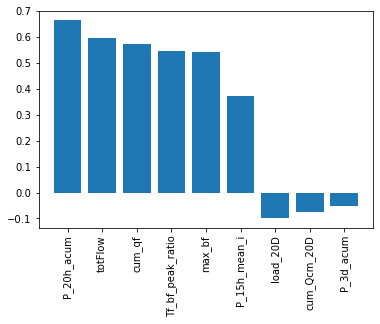

In [4]:
linear_corr = pd.DataFrame(data = np.corrcoef(np.hstack([y_train.values.reshape(-1,1), X_train]).T)[0], index = ["h"] + var_names)[0]
linear_corr_groups = groups_DF.join(linear_corr)
linear_corr_groups["abs_corr"] = linear_corr_groups[0].abs()
main_vars = linear_corr_groups.groupby("Group")["abs_corr"].idxmax().dropna()
ordered_corr = linear_corr_groups.loc[main_vars].sort_values(by = "abs_corr", ascending = False)

x_labels = ordered_corr.index
x = list(range(1, len(x_labels)+1))
y = ordered_corr[0]
plt.bar(x, y)
plt.xticks(x)
plt.gca().set_xticklabels(x_labels, rotation = 90)

In [5]:
from scipy.stats import spearmanr
sp,p = spearmanr(np.hstack([y_train.values.reshape(-1,1), X_train]))

[Text(1, 0, 'P_20h_acum'),
 Text(2, 0, 'DeltaQ'),
 Text(3, 0, 'max_qf'),
 Text(4, 0, 'bf_qf_peak_ratio'),
 Text(5, 0, 'P_15h_mean_i'),
 Text(6, 0, 'cum_bf'),
 Text(7, 0, 'load_20D'),
 Text(8, 0, 'cum_Qcm_5D'),
 Text(9, 0, 'P_20d_acum')]

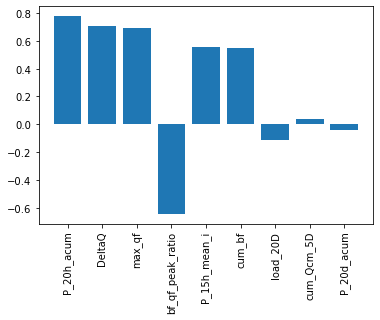

In [6]:
linear_corr = pd.DataFrame(data = sp[0], index = ["h"] + var_names)
# linear_corr
linear_corr["p"] = p[0]

linear_corr_groups = groups_DF.join(linear_corr)
linear_corr_groups["abs_corr"] = linear_corr_groups[0].abs()
 
main_vars = linear_corr_groups.groupby("Group")["abs_corr"].idxmax().dropna()
ordered_corr = linear_corr_groups.loc[main_vars].sort_values(by = "abs_corr", ascending = False)

x_labels = ordered_corr.index
x = list(range(1, len(x_labels)+1))
y = ordered_corr[0]
plt.bar(x, y)
plt.xticks(x)
plt.gca().set_xticklabels(x_labels, rotation = 90)

In [7]:
np.sqrt(((y_train-y_train.mean())**2).mean())

0.1816257432028259

# Iterate variable selection algorithms

In [3]:
model_list = initiate_models()
nvars = 6

alphascv = np.logspace(-3,0, 100)
niter = 100

for i in range(niter):                            
    if (i+1)%10 == 0:
        print(f"Iter: {i+1}/{niter}")

    FS_dict = apply_forward_selection(model_list, X_train, y_train, var_names, var_groups = group_names, n_vars_to_select = nvars)

    save_SFS_iteration(selectors_dict = FS_dict, full_var_names = var_names)

    # LR = apply_lassoCV(alphascv, X_train, y_train)

    # save_lasso_iter(LR, var_names)

    # print("--"*15)



Iter: 10/100
Iter: 20/100
Iter: 30/100
Iter: 40/100
Iter: 50/100
Iter: 60/100
Iter: 70/100
Iter: 80/100
Iter: 90/100


RandomForestRegressor
Rainfall depth [(1.0, 0.79), (2.0, 0.15), (3.0, 0.03), (4.0, 0.02), (5.0, 0.01), (6.0, 0.0), (7.0, 0.0), (8.0, 0.0), (9.0, 0.0), (10.0, 0.0), (11.0, 0.0), (12.0, 0.0), (13.0, 0.0), (14.0, 0.0), (15.0, 0.0), (16.0, 0.0), (17.0, 0.0), (18.0, 0.0), (19.0, 0.0), (20.0, 0.0), (21.0, 0.0), (22.0, 0.0), (23.0, 0.0), (24.0, 0.0), (25.0, 0.0), (26.0, 0.0), (27.0, 0.0), (28.0, 0.0), (29.0, 0.0), (30.0, 0.0), (31.0, 0.0), (32.0, 0.0), (33.0, 0.0), (34.0, 0.0), (35.0, 0.0), (36.0, 0.0), (37.0, 0.0), (38.0, 0.0), (39.0, 0.0), (40.0, 0.0)]
Ratio of Hydrograph components [(1.0, 0.1), (2.0, 0.15), (3.0, 0.23), (4.0, 0.06), (5.0, 0.08), (6.0, 0.15), (7.0, 0.0), (8.0, 0.0), (9.0, 0.0), (10.0, 0.0), (11.0, 0.0), (12.0, 0.0), (13.0, 0.0), (14.0, 0.0), (15.0, 0.0), (16.0, 0.0), (17.0, 0.0), (18.0, 0.0), (19.0, 0.0), (20.0, 0.0), (21.0, 0.0), (22.0, 0.0), (23.0, 0.0), (24.0, 0.0), (25.0, 0.0), (26.0, 0.0), (27.0, 0.0), (28.0, 0.0), (29.0, 0.0), (30.0, 0.0), (31.0, 0.0), (32.0, 0.0), (3

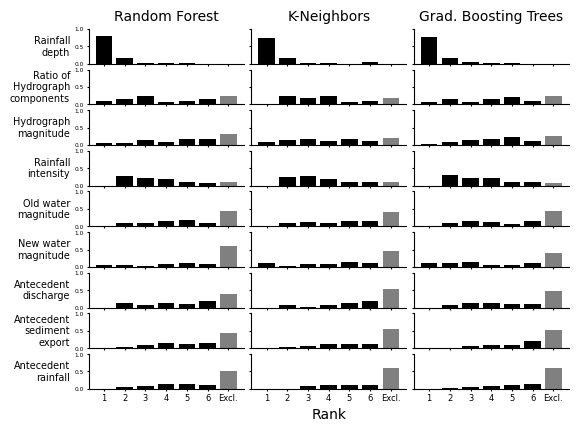

In [5]:
from src.plots_SFS_variability import plot_var_ranks_histograms

from importlib import reload
import sys
reload(sys.modules["src.plots_SFS_variability"])

from src.plots_SFS_variability import plot_var_ranks_histograms

data_folder       = "./Outputs/Models/"
data_folder       = "../paper/second_EFS_results_default_params/"
# data_folder       = "../paper/thirdEFS_results_optimized_params/"

savefig_folder    = "./Outputs/Figures/"

plot_var_ranks_histograms(data_folder, output_folder = savefig_folder, relative_counts = True)

In [2]:
data_file = './Outputs/Event_Matrix.csv'
Events_matrix = pd.read_csv(data_file,
                        header = [0,1],
                        index_col = [0]
                        )
Events_matrix.columns = Events_matrix.columns.get_level_values(1)

filtered_df = Events_matrix[["h","P_15h_acum", "P_15h_mean_i", "max_qf"]]


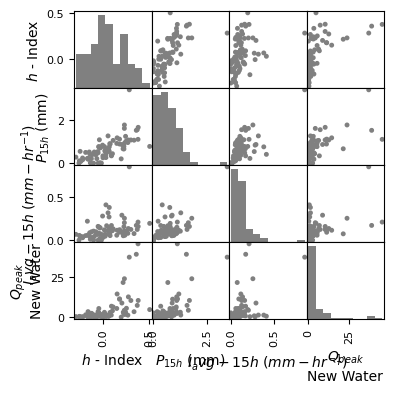

In [3]:
var_names_mapper = {"P_5h_acum"    : "5-h",
                    "P_10h_acum"   : "10-h",
                    "P_15h_acum"   : r"$P_{15h}$ (mm)",
                    "P_20h_acum"   : "20-h",
                    "P_24h_acum"   : "24-h",
                    "P_5h_max_i"   : "5-h",
                    "P_10h_max_i"  : "10-h",
                    "P_20h_max_i"  : "20-h",
                    "P_24h_max_i"  : "24-h",
                    "P_5h_mean_i"  : "5-h",
                    "P_10h_mean_i" : "10-h",
                    "P_15h_mean_i" : r"$I_avg-{15h}$ $(mm-hr^{-1} )$",
                    "P_20h_mean_i" : "20-h",
                    "P_24h_mean_i" : "24-h",
                    "cum_qf"       : "Total\nvolume",
                    "mean_qf"      : "Mean\nDischarge",
                    "max_qf"       : r"$Q_{peak}$" + "\nNew Water",
                    "h"            : r"$h$ - Index"
}

axs = pd.plotting.scatter_matrix(filtered_df, figsize=(4,4), alpha = 1, hist_kwds={"color" : "grey" }, **{"s" : 50, "c" : "grey"})

for ax in axs.flatten():
    ax.set_xlabel(var_names_mapper[ax.get_xlabel()], )
    ax.set_ylabel(var_names_mapper[ax.get_ylabel()])

# performance vs number of variables

In [ ]:
folder = "./Outputs/Models/with200trees/OutputsCaro/"

model_names = ["RandomForestRegressor", "KNeighborsRegressor", "GradientBoostingRegressor"]


param        = "avg"
model_name   = model_names[2]

filename = f"{model_name}_{param}_SFS.csv"

param_DF = pd.read_csv(folder + filename, na_values="nan")


# Visualize variable selection results 

In [4]:
var_selection_optimum_models_DF = pd.read_csv('./Outputs/Models/Variable_Selection_Summary.csv')

with open('./Outputs/Models/variable_selection_full_results.pkl', 'rb') as handle:
    all_models_dict = pickle.load(handle)


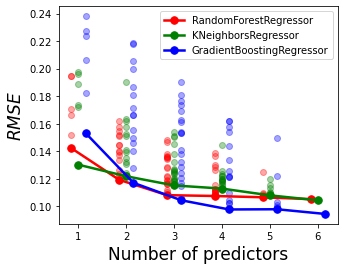

In [10]:

fig, ax = plt.subplots(figsize = (5,4))

models = list(var_selection_optimum_models_DF.model.unique())

plot_optimum_models(ax, var_selection_optimum_models_DF, models)
plot_all_models(ax, all_models_dict, models)
